In [ ]:
'''
  this part is responsible for the mounting of data from the drive into the
  notebook and retrieving the dataset
'''
from google.colab import drive
drive.mount('/content/drive/')

!cp './drive/My Drive/Graduation project/pistol.zip' /content
!unzip ./pistol.zip


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
Archive:  ./pistol.zip
   creating: Test/
  inflating: Test/frame583.jpg       
   creating: __MACOSX/
   creating: __MACOSX/Test/
  inflating: __MACOSX/Test/._frame583.jpg  
  inflating: Test/frame597.jpg       
  inflating: __MACOSX/Test/._frame597.jpg  
  inflating: Test/frame540.jpg       
  inflating: __MACOSX/Test/._frame540.jpg  
  inflating: Test/frame226.jpg       
  inflating: __MACOSX/Test/._frame226.jpg  
  inflating: Test/frame232.jpg       
  in

In [ ]:
'''
  This part contains the used libraries and essintial parameters
  such as frames and dimensions
'''
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19,ResNet50
from tensorflow.keras.layers import LSTM , Dense , TimeDistributed, Flatten, Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D, Input
from tensorflow.keras.layers import Reshape, BatchNormalization ,ConvLSTM2D , Convolution2D , Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam , RMSprop, SGD

IMG_SIZE = 160

In [ ]:
'''
  This algorithm uses the history data from the training of the model (.fit)
  in order to plot the loss and accuracy at each epoch
'''
def plot_results(history):  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.legend()

  plt.show()
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()

  plt.show()

In [ ]:
images = []
labels = []
train_dtframe = pd.DataFrame()

for i in range(274):
  strng = 'Test/frame' + str(i+1) + '.jpg'
  img = cv2.imread(strng)
  
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img = img/255.0
  images.append(img)
  labels.append(0)
  strng = 'Test/frame' + str(i+304) + '.jpg'
  img = cv2.imread(strng)
  
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img = img/255.0
  images.append(img)
  labels.append(1)

test_images = []
test_labels = []
test_dtframe = pd.DataFrame()

for i in range(30):
  strng = 'Test/frame' + str(i+275) + '.jpg'
  img = cv2.imread(strng)
  
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img = img/255.0
  test_images.append(img)
  test_labels.append(0)
  strng = 'Test/frame' + str(i+578) + '.jpg'
  img = cv2.imread(strng)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img = img/255.0
  test_images.append(img)
  test_labels.append(1)


In [ ]:
train_dtframe['image'] = images
train_dtframe['labels'] = labels
test_dtframe['image'] = test_images
test_dtframe['labels'] = test_labels

train_dtframe = train_dtframe.sample(frac=1).reset_index(drop=True)
test_dtframe = test_dtframe.sample(frac=1).reset_index(drop=True)

In [ ]:
timg = []
for i in range(len(train_dtframe)):
  timg.append(train_dtframe['image'][i])
images = np.array(timg)
labels = np.array(train_dtframe['labels'])

vimg = []
for i in range(len(test_dtframe)):
  vimg.append(test_dtframe['image'][i])
test_images = np.array(vimg)
test_labels = np.array(test_dtframe['labels'])

print(images.shape)
print(labels.shape)
print(test_images.shape)
print(test_labels.shape)

(548, 160, 160, 3)
(548,)
(60, 160, 160, 3)
(60,)


In [ ]:
train_images, val_images, train_labels , val_labels = train_test_split(images , labels, test_size=0.2)

In [ ]:
'''
  Defining the model's layers
'''
def model():

  model= Sequential()
  model.add(VGG19(include_top=False,weights= 'imagenet' ,input_shape=(160, 160,3)))
  model.add(Flatten());
  model.add(Dense(256));
  model.add(Activation('relu'));
  model.add(Dense(64));
  model.add(Activation('relu'));
  #model.add(Dropout(0.2));
  model.add(BatchNormalization())
  model.add(Dense(1));
  model.add(Activation('sigmoid'));
  model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [ ]:
model = model()
hist = model.fit(train_images,train_labels,batch_size=16, epochs=20, validation_data=(val_images , val_labels))


80142336/80134624 [==============================] - 0s 0us/step
Epoch 1/20
28/28 [==============================] - 6s 199ms/step - loss: 0.4945 - accuracy: 0.7671 - val_loss: 3.6235 - val_accuracy: 0.4727
Epoch 2/20
28/28 [==============================] - 4s 142ms/step - loss: 0.2936 - accuracy: 0.8858 - val_loss: 0.2470 - val_accuracy: 0.9000
Epoch 3/20
28/28 [==============================] - 4s 143ms/step - loss: 0.2881 - accuracy: 0.8767 - val_loss: 1.1089 - val_accuracy: 0.6545
Epoch 4/20
28/28 [==============================] - 4s 143ms/step - loss: 0.2772 - accuracy: 0.8881 - val_loss: 39.2326 - val_accuracy: 0.5636
Epoch 5/20
28/28 [==============================] - 4s 144ms/step - loss: 0.2892 - accuracy: 0.8950 - val_loss: 0.2569 - val_accuracy: 0.8636
Epoch 6/20
28/28 [==============================] - 4s 144ms/step - loss: 0.2889 - accuracy: 0.8836 - val_loss: 0.5243 - val_accuracy: 0.8364
Epoch 7/20
28/28 [==============================] - 4s 145ms/step - loss: 0.2505 -

In [ ]:
model.save("PistolDetection.h5")

In [ ]:
preds = model.predict(test_images)

In [ ]:
print(preds)
print(test_labels)

[[0.01163222]
 [0.13046008]
 [0.99967575]
 [0.05003744]
 [0.13743612]
 [0.2176561 ]
 [0.05832902]
 [0.7780728 ]
 [0.98765343]
 [0.02710705]
 [0.11484241]
 [0.06359243]
 [0.0185477 ]
 [0.07400675]
 [0.04452205]
 [0.99196905]
 [0.05622006]
 [0.21319562]
 [0.9947903 ]
 [0.9764524 ]
 [0.9999652 ]
 [0.06250045]
 [0.05650492]
 [0.9623837 ]
 [0.9984756 ]
 [0.02290695]
 [0.9999609 ]
 [0.02423228]
 [0.12407888]
 [0.02291206]
 [0.02908084]
 [0.03201594]
 [0.02940988]
 [0.99732333]
 [0.10787721]
 [0.8738539 ]
 [0.99954706]
 [0.9036448 ]
 [0.40209842]
 [0.9952638 ]
 [0.9989312 ]
 [0.06242711]
 [0.09294064]
 [0.05599567]
 [0.99819463]
 [0.38970605]
 [0.02770993]
 [0.992698  ]
 [0.99844766]
 [0.5944108 ]
 [0.15018095]
 [0.9651158 ]
 [0.10770883]
 [0.8779371 ]
 [0.9897654 ]
 [0.98119915]
 [0.131821  ]
 [0.62521553]
 [0.72178113]
 [0.6040882 ]]
[0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0]


In [ ]:
count = 0
for i in range(len(test_labels)):
  if preds[i] > 0.5 and test_labels[i] == 1:
    count += 1
  elif preds[i] < 0.5 and test_labels[i] ==0:
    count +=1
print(str(count) + "\t" + str(len(test_labels)))

51	60


In [ ]:
!cp './drive/My Drive/Graduation project/pistol.MP4' /content
!cp './drive/My Drive/Graduation project/suv.mp4' /content
!cp './drive/My Drive/Graduation project/name.mp4' /content
!cp './drive/My Drive/MMA/fi_val1.mp4' /content

In [ ]:
cap = cv2.VideoCapture('pistol.MP4')
arrimg = []
i = 0
pdet = 0
nodet = 0
while(cap.isOpened()):
    ret, img = cap.read()
    imrs = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    imrs=imrs.astype('float32')/255
    x=[]
    x.append(imrs)
    x=np.array(x)
    predictions = model.predict(x)
    #print("printing model predictions:   ",predictions)
    result = predictions[0]
    if result > 0.5:
        string = str(i) + " Pistol Detected: " + str(predictions[0])
        pdet += 1
    elif result < 0.5:
         string = str(i) + " No Weapon Detected: " + str(predictions[0])
         nodet += 1

    cv2.putText(img, string , (5, 100), cv2.FONT_HERSHEY_PLAIN, 1, (66, 53, 243), 2)
    #cv2_imshow(img) # live feed in external
    arrimg.append(img)
    i += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


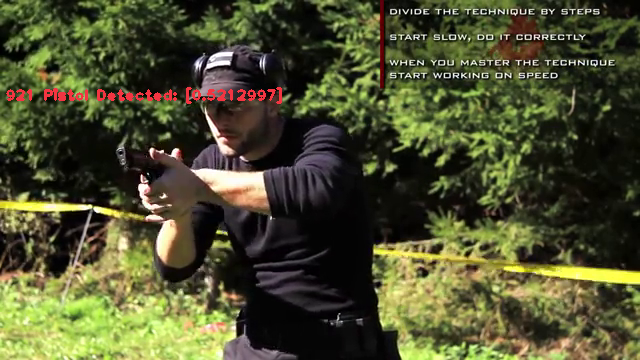

196	1677


In [ ]:
cv2_imshow(arrimg[921])